In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [2]:
route = pd.read_csv("route.csv", index_col='id')
time = pd.read_csv("time.csv")
patient = pd.read_csv("patient.csv", index_col='id')

In [15]:
df_route = pd.read_csv("route.csv", index_col='id')
df_time = pd.read_csv("time.csv")
df_patient = pd.read_csv("patient.csv", index_col='id')

In [4]:
patient.head()

,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
id,,,,,,,,,,,,,
1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,NaN,NaN,isolated


In [5]:
time.head()

,date,acc_test,acc_negative,acc_confirmed,acc_released,acc_deceased,new_test,new_negative,new_confirmed,new_released,new_deceased
0,2020-01-20,1,0,1,0,0,1,0,1,0,0
1,2020-01-21,1,0,1,0,0,0,0,0,0,0
2,2020-01-22,4,3,1,0,0,3,3,0,0,0
3,2020-01-23,22,21,1,0,0,18,18,0,0,0
4,2020-01-24,27,25,2,0,0,5,4,1,0,0


In [6]:
route.head()

,date,province,city,visit,latitude,longitude
id,,,,,,
1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680
1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558
2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884
2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627
3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680


In [7]:
time['date'] = time['date'].apply(lambda x: '{:%m-%d}'.format(dt.strptime(x, '%Y-%m-%d')))
#time.set_index('date') = time.set_index('date')
time.set_index('date', inplace=True)
time.head()

,acc_test,acc_negative,acc_confirmed,acc_released,acc_deceased,new_test,new_negative,new_confirmed,new_released,new_deceased
date,,,,,,,,,,
01-20,1,0,1,0,0,1,0,1,0,0
01-21,1,0,1,0,0,0,0,0,0,0
01-22,4,3,1,0,0,3,3,0,0,0
01-23,22,21,1,0,0,18,18,0,0,0
01-24,27,25,2,0,0,5,4,1,0,0


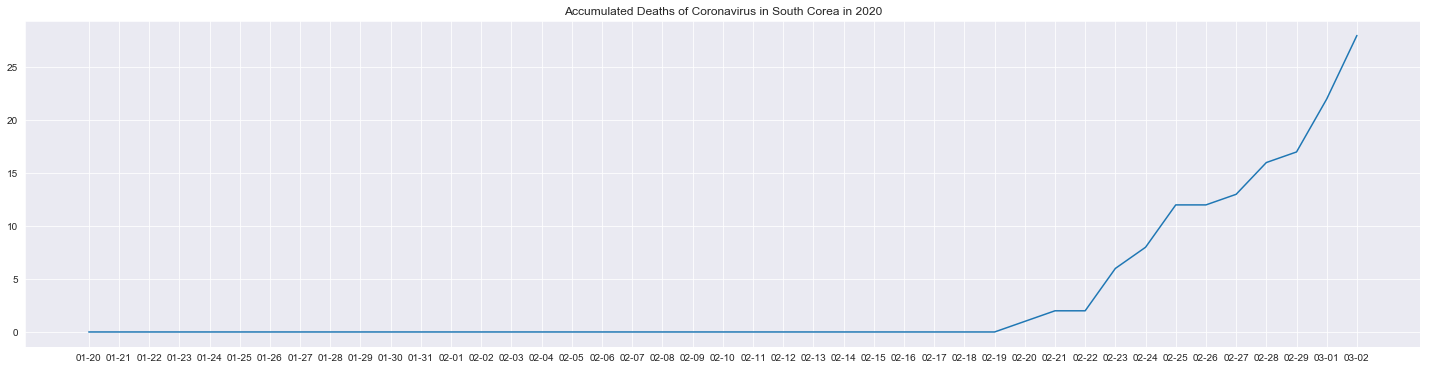

In [8]:
plt.figure(figsize=(25,6))
sns.set_style("darkgrid")
plt.title("Accumulated Deaths of Coronavirus in South Corea in 2020")
sns.lineplot(data=time['acc_deceased'])

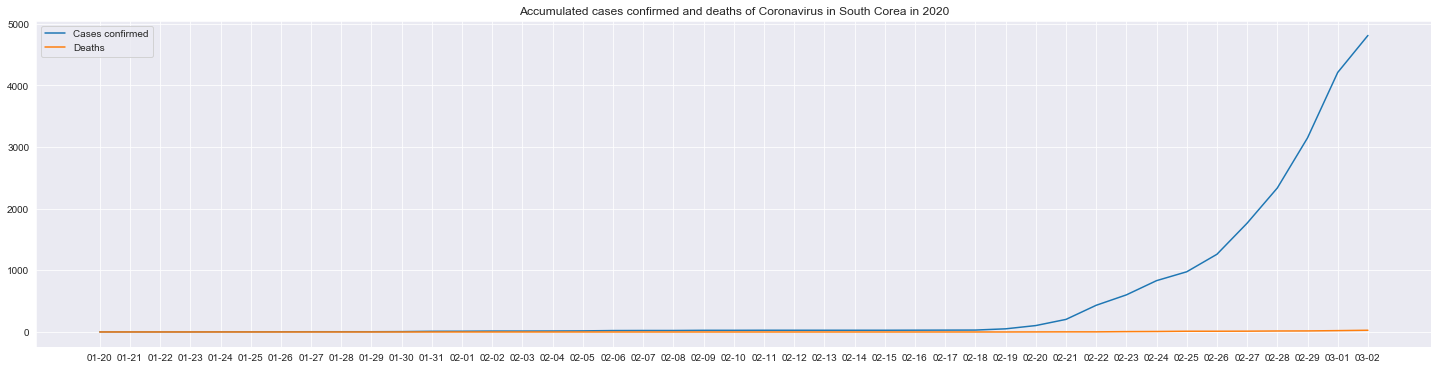

In [9]:
plt.figure(figsize=(25,6))
sns.set_style("darkgrid")

plt.title("Accumulated cases confirmed and deaths of Coronavirus in South Corea in 2020")
sns.lineplot(data=time['acc_confirmed'], label="Cases confirmed")
sns.lineplot(data=time['acc_deceased'], label="Deaths")

In [10]:
patient['age'] = 2020 - patient['birth_year'] 

patient['days_in_hospital'] = pd.to_datetime(patient['released_date'], errors='coerce') - pd.to_datetime(patient['confirmed_date'], errors='coerce') 
patient['days_in_hospital'] = patient['days_in_hospital'].apply(lambda x: x.days)
patient.head()

,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age,days_in_hospital
id,,,,,,,,,,,,,,,
1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,36.0,17.0
2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,56.0,12.0
3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,54.0,17.0
4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,56.0,13.0
5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,NaN,NaN,isolated,33.0,NaN


In [11]:
dead = patient[patient.state == 'deceased']
dead

,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age,days_in_hospital
id,,,,,,,,,,,,,,,
38,female,1963.0,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,2020-02-18,NaN,2020-02-23,deceased,57.0,NaN
54,male,1963.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased,57.0,NaN
55,male,1961.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased,59.0,NaN
103,male,1957.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-20,NaN,2020-02-19,deceased,63.0,NaN
107,male,1953.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-24,deceased,67.0,NaN
114,male,1946.0,Korea,Daegu,Shincheonji Church,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-26,deceased,74.0,NaN
205,female,1965.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-02-21,deceased,55.0,NaN
286,male,1958.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-02-23,deceased,62.0,NaN
298,male,1962.0,Korea,Gyeongsangbuk-do,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-22,NaN,2020-02-25,deceased,58.0,NaN


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


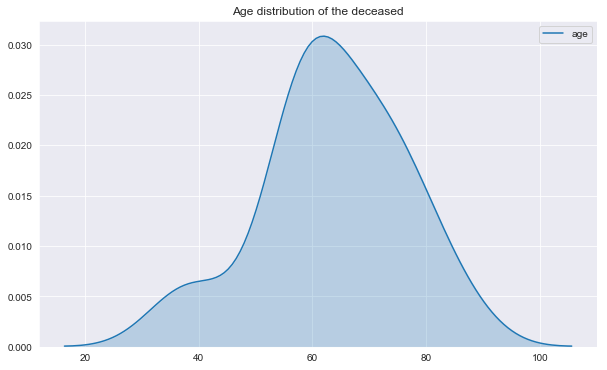

In [12]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")

plt.title("Age distribution of the deceased")
sns.kdeplot(data=dead['age'], shade=True)

In [13]:
male_dead = dead[dead.sex=='male']
female_dead = dead[dead.sex=='female']

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer

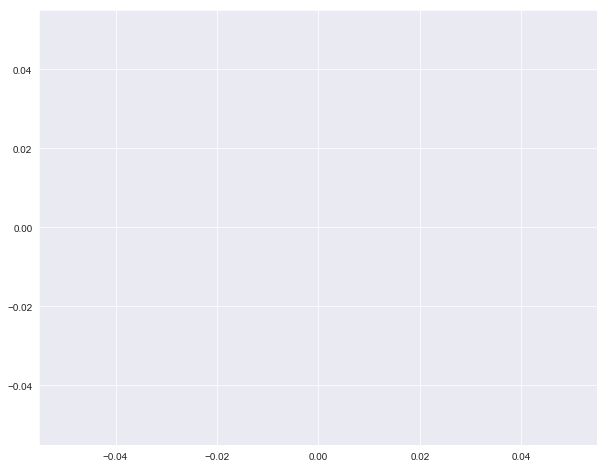

In [14]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.distplot(a=male_dead['age'], label="Men", kde=False)
sns.distplot(a=female_dead['age'], label="Women", kde=False)

# Add title
plt.title("Age distribution of the deceased by sex")

# Force legend to appear
plt.legend()



In [16]:
df_patient['birth_year'] = df_patient.birth_year.fillna(0.0).astype(int)
df_patient['birth_year'] = df_patient['birth_year'].map(lambda val: val if val > 0 else np.nan)

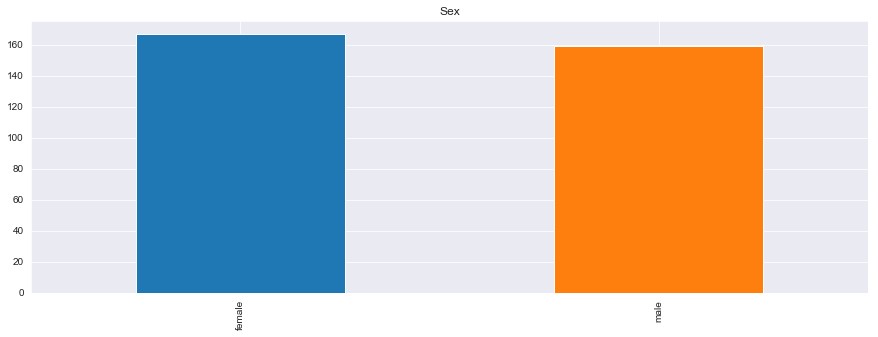

In [17]:
plt.figure(figsize=(15, 5))
plt.title('Sex')
df_patient.sex.value_counts().plot.bar();

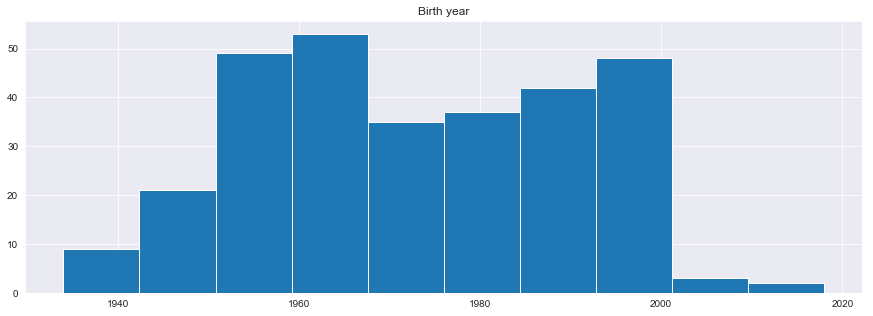

In [18]:
plt.figure(figsize=(15, 5))
plt.title('Birth year')
df_patient.birth_year.hist();

In [21]:
df_patient['age'] = datetime.now().year - df_patient.birth_year 

In [20]:
from datetime import datetime

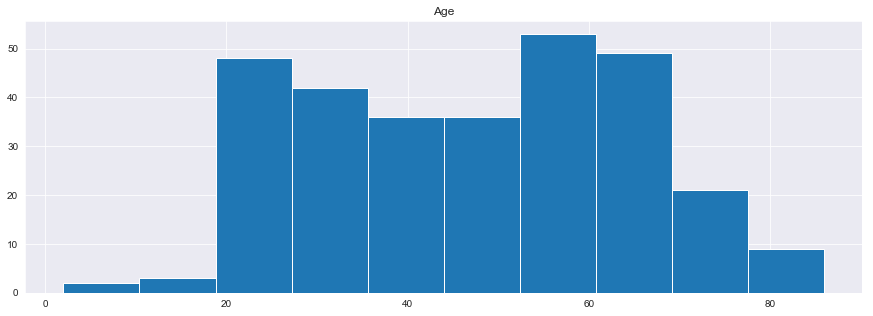

In [22]:
plt.figure(figsize=(15, 5))
plt.title('Age')
df_patient['age'].hist();

In [23]:
df_patient.country.value_counts()

Korea       4803
China          8
Mongolia       1
Name: country, dtype: int64

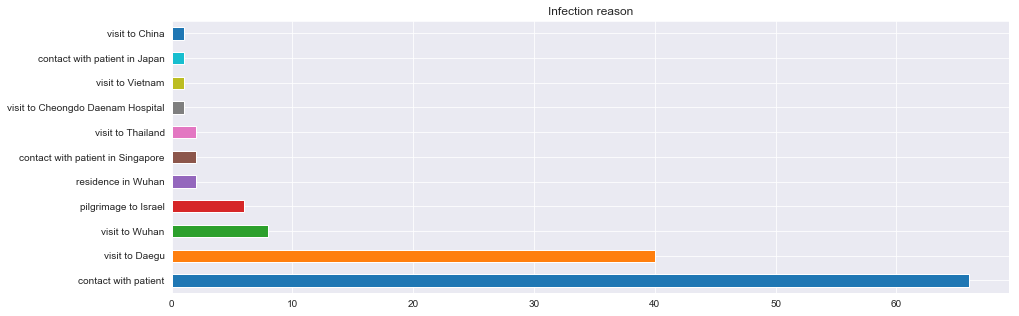

In [24]:
plt.figure(figsize=(15,5))
plt.title('Infection reason')
df_patient.infection_reason.value_counts().plot.barh();

In [26]:
df_patient.state.value_counts()

isolated    4764
released      28
deceased      20
Name: state, dtype: int64

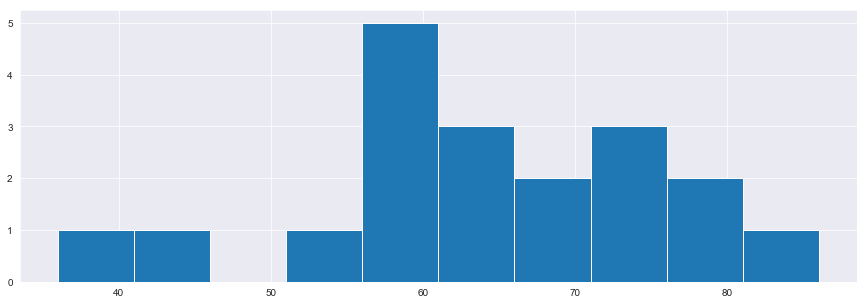

In [28]:
df_patient[df_patient.state == 'deceased']['age'].hist(figsize=(15,5));

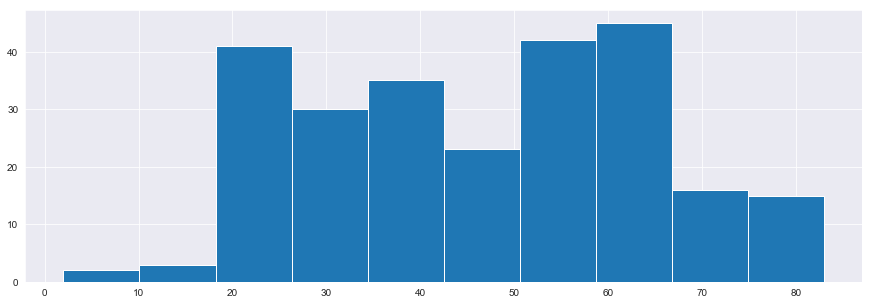

In [29]:
df_patient[df_patient.state == 'isolated']['age'].hist(figsize=(15,5));

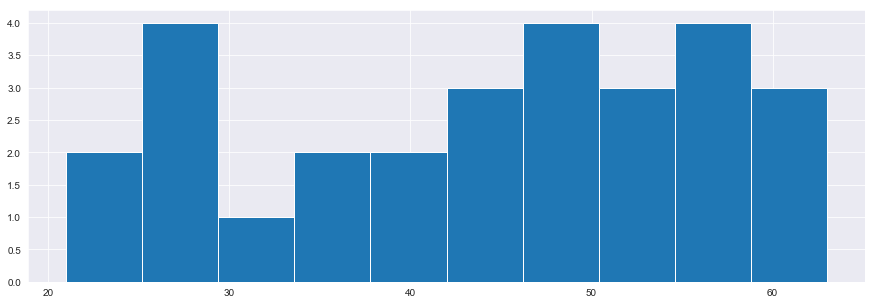

In [30]:
df_patient[df_patient.state == 'released']['age'].hist(figsize=(15,5));

In [31]:
df_route.head()

,date,province,city,visit,latitude,longitude
id,,,,,,
1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680
1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558
2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884
2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627
3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680


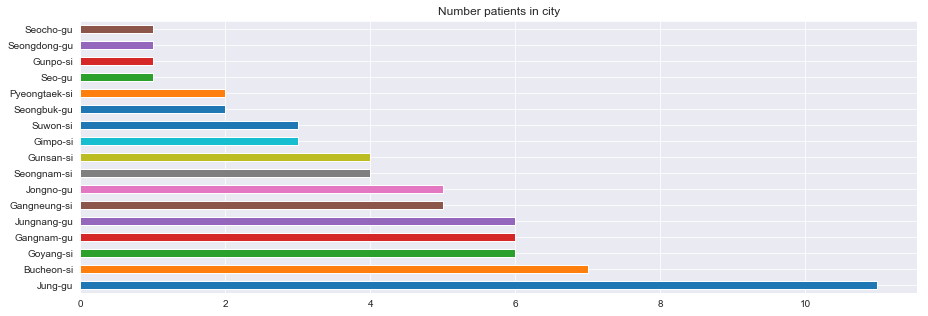

In [33]:
plt.figure(figsize=(15,5))
plt.title('Number patients in city')
df_route.city.value_counts().plot.barh();

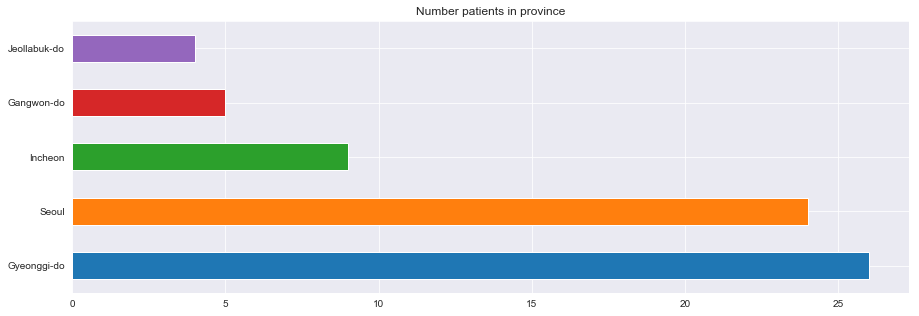

In [34]:
plt.figure(figsize=(15,5))
plt.title('Number patients in province')
df_route.province.value_counts().plot.barh();

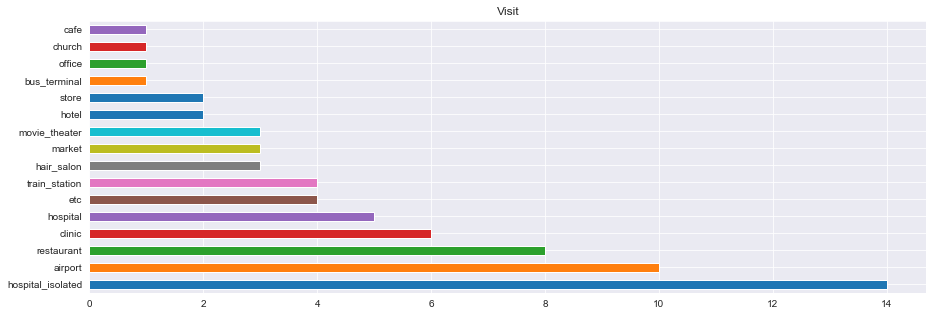

In [35]:
plt.figure(figsize=(15,5))
plt.title('Visit')
df_route.visit.value_counts().plot.barh();

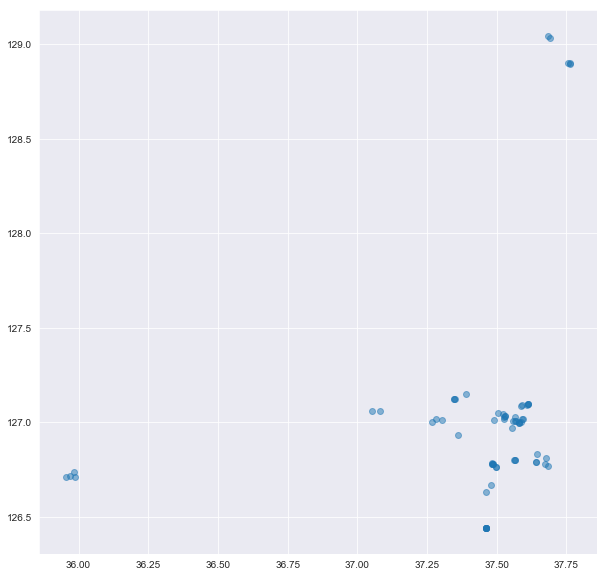

In [36]:
latitude = df_route.latitude
longitude = df_route.longitude
plt.figure(figsize=(10,10))
plt.scatter(latitude,longitude, alpha=.5);